In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
import plotly   
import seaborn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd 


In [3]:
df = pd.read_csv("../data/Linear-regression-example-data.csv", header= 0, sep=";")
df.head()

,X,Y
0,"84,359","59,8077"
1,"72,8205","52,5"
2,"96,4103","49,4231"
3,"7,1795","90,1923"
4,"10,2564","80,9615"


In [4]:
df["X"] = df["X"].str.replace(',', '.').astype(float)
df["Y"] = df["Y"].str.replace(',', '.').astype(float)


X     98.4615
Y    100.9615
dtype: float64

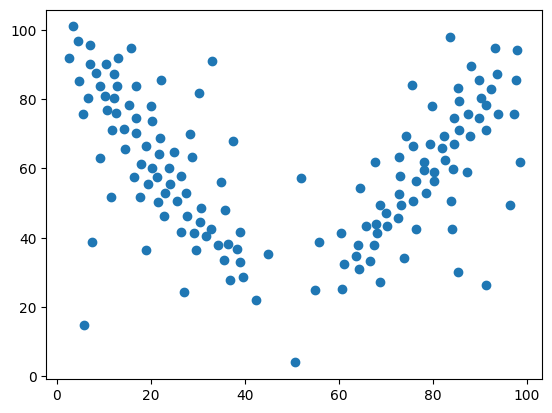

In [5]:
X_train = df["X"]
Y_train = df["Y"]

plt.scatter(X_train, Y_train,)

df.max()

In [6]:
X_train, Y_train = torch.tensor(df["X"], dtype=torch.float32), torch.tensor(df["Y"], dtype=torch.float32)

X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
Y_train = (Y_train - Y_train.min()) / (Y_train.max() - Y_train.min())

print(X_train, Y_train)

X_train = X_train.view(-1, 1)  # transforme (N,) en (N,1)
Y_train = Y_train.view(-1, 1)



tensor([0.8529, 0.7326, 0.9786, 0.0481, 0.0802, 0.0348, 0.7701, 0.7620, 0.7380,
        0.1979, 0.3797, 0.1711, 0.1497, 0.8636, 0.0695, 0.3316, 0.9091, 0.0829,
        0.1390, 0.8102, 0.8663, 0.0508, 0.2888, 0.7701, 0.0428, 0.1765, 0.3048,
        0.9465, 0.1337, 0.7353, 0.8316, 0.1096, 0.1043, 0.5561, 0.9251, 0.3369,
        0.2246, 0.0963, 0.8048, 0.6898, 0.9144, 0.1070, 0.3743, 0.1444, 0.8850,
        0.0936, 1.0000, 0.3182, 0.2487, 0.0321, 0.0695, 0.9251, 0.3797, 0.8476,
        0.8556, 0.6898, 0.1016, 0.2727, 0.2594, 0.7647, 0.1016, 0.9091, 0.1845,
        0.1711, 0.8449, 0.5027, 0.9947, 0.2112, 0.6845, 0.1497, 0.2005, 0.2941,
        0.1497, 0.5455, 0.8636, 0.7888, 0.3877, 0.9358, 0.4144, 0.7888, 0.9251,
        0.1818, 0.3583, 0.7487, 0.6791, 0.0856, 0.8503, 0.7647, 0.9519, 0.7433,
        0.0481, 0.8824, 0.6043, 0.0107, 0.1230, 0.6604, 0.7032, 0.8102, 0.2326,
        0.3449, 0.6417, 0.6070, 0.8556, 0.1578, 0.1952, 0.6471, 0.2914, 0.7059,
        0.2567, 0.8289, 0.2487, 0.0615, 

In [7]:
class LinearRegression(nn.Module):
    def __init__(self, inputSize, outputSize):
        super().__init__()
        self.linear = nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [8]:
inputSize = 1
outputSize = 1
learning_rate = 0.001
epochs= 10000

model = LinearRegression(inputSize=inputSize,outputSize=outputSize)

In [9]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:03<00:00, 2557.20it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


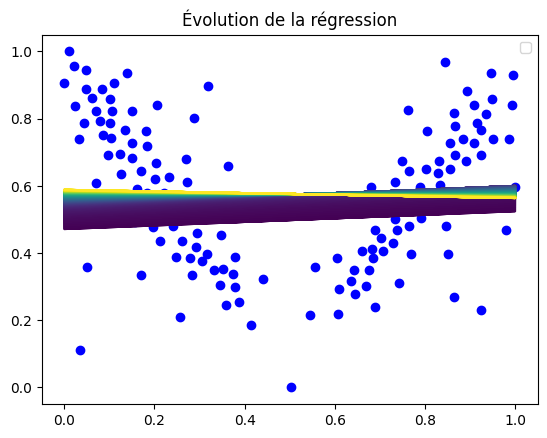

In [10]:
from tqdm import tqdm
import matplotlib.pyplot as plt

# Nombre de snapshots à afficher
interval = 10

# Crée une figure
fig, ax = plt.subplots()
ax.scatter(X_train, Y_train, color='blue')

# Stocke les couleurs pour distinguer les courbes
colors = plt.cm.viridis(np.linspace(0, 1, epochs//interval + 1))

snapshot = 0
items = range(epochs)

for epoch in tqdm(items):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    loss.backward()
    optimizer.step()

    # Chaque "interval" epochs, on trace une courbe
    if epoch % interval == 0:
        #print(f"Epoch {epoch}, Loss: {loss.item()}")
        predicted = model(X_train).detach()
        ax.plot(X_train, predicted, color=colors[snapshot])
        snapshot += 1

ax.legend()
plt.title("Évolution de la régression")
plt.show()


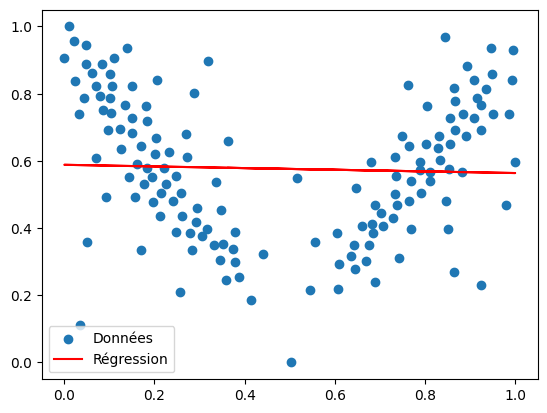

In [11]:



predicted = model(X_train).detach()
plt.scatter(X_train, Y_train, label='Données')
plt.plot(X_train, predicted, color='r', label='Régression')
plt.legend()
plt.show()


In [12]:
# model = nn.Linear(n_features, 1)
coefficients = model.linear.weight.detach().numpy()  # array de coefficients
intercept = model.linear.bias.item()

coefficients, intercept


(array([[-0.02456406]], dtype=float32), 0.5883424878120422)

In [13]:
class PolynomialRegression(nn.Module):
    def __init__(self, degree, outputSize):
        super().__init__()
        self.linear = nn.Linear(degree, outputSize) 

    def forward(self, x):
        x = self.linear(x)
        return x

In [14]:
# X_train = X_train.view(-1, 2)
# Y_train = Y_train.view(-1, 2)

In [15]:
degree = 2

X_train_poly = torch.cat([X_train**i for i in range(1, degree+1)], dim=1)
model = PolynomialRegression(degree, outputSize=outputSize)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
X_train_poly.shape, X_train.shape

(torch.Size([150, 2]), torch.Size([150, 1]))

100%|██████████| 10000/10000 [00:01<00:00, 6046.29it/s]


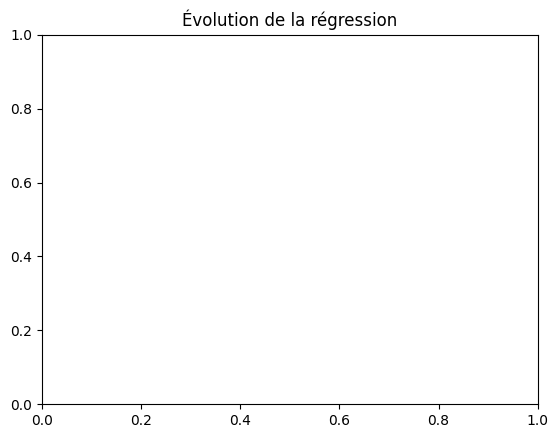

In [16]:
from tqdm import tqdm
import matplotlib.pyplot as plt

# Nombre de snapshots à afficher
interval = 10


# Crée une figure
epochs = 10000
# Stocke les couleurs pour distinguer les courbes

items = range(epochs)

for epoch in tqdm(items):
    optimizer.zero_grad()
    outputs = model(X_train_poly)
    loss = criterion(outputs, Y_train)
    loss.backward()
    optimizer.step()

    # Chaque "interval" epochs, on trace une courbe
    if epoch % interval == 10:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

plt.title("Évolution de la régression")
plt.show()

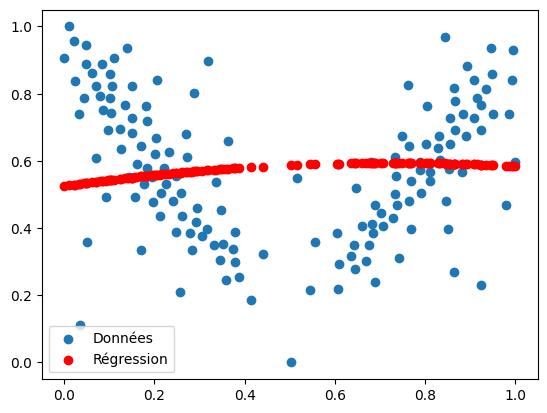

In [17]:

predicted = model(X_train_poly).detach()
plt.scatter(X_train_poly[:, 0], Y_train, label='Données')
plt.scatter(X_train, predicted, color='r', label='Régression')
plt.legend()
plt.show()

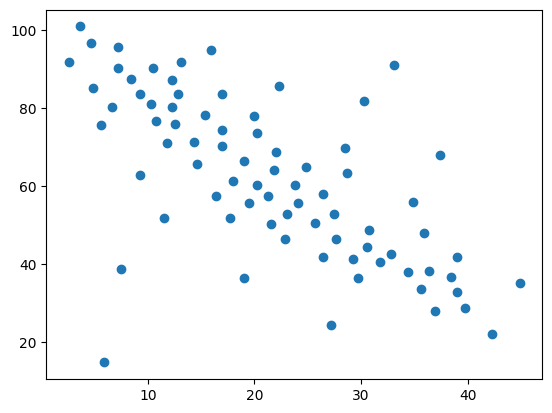

In [41]:
less = df[df['X'] <= 50]
plt.scatter(less['X'], less['Y'])


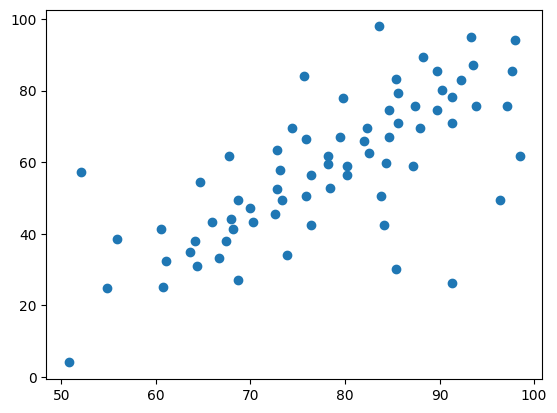

In [43]:
max = df[df['X'] > 50]
plt.scatter(max['X'], max['Y'])